# Day 13

In [42]:
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day13.txt',
    'r').read().split("\n\n")

dots = set()
for line in data[0].split("\n"):
    x, y = line.split(",")
    dots.add((int(x), int(y)))

# print(dots)

folds = []
for line in data[1].split("\n"):
    dir, pos = line.split(" ")[2].split("=")
    folds.append((dir, int(pos)))

# print(folds)

## Part 1

In [43]:
from typing import Set, List, Tuple
from operator import itemgetter
import numpy as np

def findNumDotsAfterFirstFold(dots: Set[Tuple[int, int]],
                              folds: List[Tuple[str, int]]) -> int:

    max_x = max(dots, key = itemgetter(0))[0]
    max_y = max(dots, key = itemgetter(1))[1]
    grid = np.array([["#" if (i, j) in dots else "."
                      for i in range(max_x + 1)] for j in range(max_y + 1)])
    rows, cols = grid.shape
    axis, line = folds[0]
    if axis == "y":
        for l in range(line + 1, rows):
            for i in range(cols):
                if grid[l, i] == "#":
                    grid[line-(l-line), i] = "#"
        grid = grid[:line, :]

    elif axis == "x":
        for l in range(line + 1, cols):
            for i in range(rows):
                if grid[i, l] == "#":
                    grid[i, line-(l-line)] = "#"
        grid = grid[:, :line]

    # print(grid)
    return (grid == "#").sum()


In [44]:
findNumDotsAfterFirstFold(dots, folds)

682

## Part 2

In [69]:
import matplotlib.pyplot as plt

def findHiddenCode(dots: Set[Tuple[int, int]],
                   folds: List[Tuple[str, int]]) -> None:

    max_x = max(dots, key = itemgetter(0))[0]
    max_y = max(dots, key = itemgetter(1))[1]
    grid = np.array([["#" if (i, j) in dots else "."
                      for i in range(max_x + 1)] for j in range(max_y + 1)])
    for fold in folds:
        rows, cols = grid.shape
        axis, line = fold
        if axis == "y":
            for l in range(line + 1, rows):
                for i in range(cols):
                    if grid[l, i] == "#":
                        grid[line-(l-line), i] = "#"
            grid = grid[:line, :]

        elif axis == "x":
            for l in range(line + 1, cols):
                for i in range(rows):
                    if grid[i, l] == "#":
                        grid[i, line-(l-line)] = "#"
            grid = grid[:, :line]

    result = np.argwhere(grid == "#")
    print(len(result))

    x_val, y_val = [x[1] for x in result], [-x[0] for x in result]
    plt.figure(figsize=(6, 1), dpi=80)
    plt.scatter(x_val, y_val)
    plt.show()

104


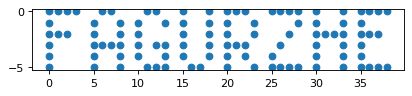

In [68]:
findHiddenCode(dots, folds)